# 분류 예제

In [22]:
import pandas as pd
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

from sklearn.preprocessing import StandardScaler # 연속변수의 표준화
from sklearn.model_selection import train_test_split 


import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

In [2]:
# 데이터 불러오기
data = pd.read_excel("./data/exam 분류.xlsx")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X25,X26,X27,X28,X29,X30,X31,X32,X33,Target
0,1,1,105,11,-0.006,0.746,0.146,-0.006,0.797,0.147,...,0.137,0.853,0.103,-0.006,0.812,0.162,-0.012,0.759,0.159,1
1,1,1,105,11,-0.012,0.612,0.012,0.012,0.724,0.074,...,0.190,0.835,0.085,-0.018,0.681,0.031,-0.012,0.679,0.079,1
2,1,1,105,11,0.012,0.727,0.127,0.006,0.794,0.144,...,0.197,0.856,0.106,-0.012,0.743,0.093,-0.018,0.656,0.056,1
3,1,1,105,11,0.000,0.774,0.174,0.012,0.684,0.034,...,0.128,0.793,0.043,-0.017,0.655,0.005,-0.012,0.688,0.088,1
4,1,1,105,11,-0.006,0.772,0.172,-0.006,0.825,0.175,...,0.102,0.809,0.059,-0.006,0.750,0.100,-0.012,0.711,0.111,1


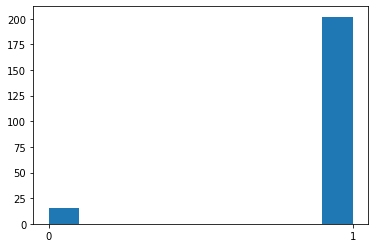

1    202
0     15
Name: Target, dtype: int64


In [3]:
# 간단한 그래프 

plt.hist(data['Target'])
plt.xticks([0,1])
plt.show()

print(data['Target'].value_counts())

In [4]:
data_shuffle = data.sample(frac=1) #frac = 1 이므로 100% , 즉 모든 데이터를 뽑아서 섞는 것과 동일한 효과임 
print(data_shuffle.head())
data_np = data_shuffle.to_numpy()
print(data_np[:5])

     X1  X2   X3  X4     X5     X6     X7     X8     X9    X10  ...    X25  \
173   2   3   85  11  0.012  0.698  0.098  0.012  0.709  0.059  ...  0.118   
203   2   3   85  11  0.006  0.786  0.186  0.012  0.739  0.089  ...  0.187   
193   2   3   85  11 -0.012  0.712  0.112  0.012  0.745  0.095  ...  0.164   
209   2   3   85  11  0.012  0.740  0.140  0.006  0.779  0.129  ...  0.140   
91    1   1  105  11 -0.006  0.760  0.160  0.006  0.830  0.180  ...  0.145   

       X26    X27    X28    X29    X30    X31    X32    X33  Target  
173  0.809  0.059 -0.012  0.737  0.087 -0.006  0.782  0.182       1  
203  0.849  0.099 -0.018  0.731  0.081 -0.012  0.769  0.169       1  
193  0.844  0.094 -0.012  0.770  0.120  0.000  0.814  0.214       1  
209  0.843  0.093 -0.006  0.792  0.142  0.000  0.825  0.225       1  
91   0.853  0.103 -0.012  0.787  0.137 -0.012  0.732  0.132       1  

[5 rows x 34 columns]
[[ 2.0000e+00  3.0000e+00  8.5000e+01  1.1000e+01  1.2000e-02  6.9800e-01
   9.8000e-02 

In [5]:
# 훈련 데이터와 테스트 데이터로 분리
train_idx = int(len(data_np) * 0.8)
train_X, train_Y = data_np[:train_idx, :-1], data_np[:train_idx, -1]
test_X, test_Y = data_np[train_idx:, :-1], data_np[train_idx:, -1]

print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

[ 2.0000e+00  3.0000e+00  8.5000e+01  1.1000e+01  1.2000e-02  6.9800e-01
  9.8000e-02  1.2000e-02  7.0900e-01  5.9000e-02  4.2256e+01  8.2900e-01
  7.9000e-02 -6.0000e-03  8.0400e-01  1.5400e-01  0.0000e+00  7.9200e-01
  1.9200e-01  0.0000e+00  8.0700e-01  2.0700e-01 -6.0000e-03  7.6800e-01
  1.1800e-01  8.0900e-01  5.9000e-02 -1.2000e-02  7.3700e-01  8.7000e-02
 -6.0000e-03  7.8200e-01  1.8200e-01]
1.0
[ 1.000e+00  1.000e+00  1.050e+02  1.100e+01  0.000e+00  7.760e-01
  1.760e-01 -1.200e-02  7.420e-01  9.200e-02  4.162e+01  8.210e-01
  7.100e-02  1.200e-02  7.230e-01  7.300e-02 -6.000e-03  7.290e-01
  1.290e-01 -1.200e-02  7.140e-01  1.140e-01 -1.800e-02  6.840e-01
  3.400e-02  8.240e-01  7.400e-02 -6.000e-03  7.880e-01  1.380e-01
 -6.000e-03  7.500e-01  1.500e-01]
1.0


In [6]:
from imblearn.over_sampling import SMOTE

resampled_X, resampled_Y = SMOTE(random_state=2021).fit_resample(train_X, train_Y)

Text(0.5, 1.0, 'SMOTE Training Data')

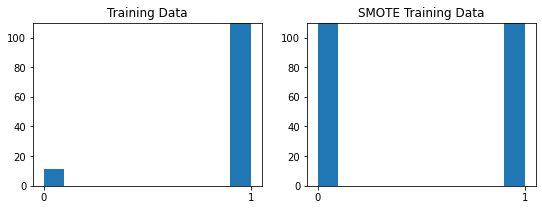

In [7]:
# 간단한 그래프 

plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.hist(train_Y)
plt.ylim(0, 110)
plt.xticks([0,1])
plt.title('Training Data')

plt.subplot(122)
plt.hist(resampled_Y)
plt.ylim(0, 110)
plt.xticks([0,1])
plt.title('SMOTE Training Data')

In [8]:
# utils의 to_categorical은 target 값을 one-hot-encoding 방식으로 바꿈
resampled_Y = tf.keras.utils.to_categorical(resampled_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(resampled_Y[0])
print(test_Y[0])

[0. 1.]
[0. 1.]


In [9]:
# 데이터 정규화

scaler = StandardScaler()
scaler.fit(resampled_X)
resampled_X = scaler.transform(resampled_X)

scaler = StandardScaler()
scaler.fit(test_X)
test_X = scaler.transform(test_X)

In [15]:
# 데이터세트 분류 모델 생성

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu', input_shape=(33,)),
    tf.keras.layers.Dense(units=70, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               3400      
_________________________________________________________________
dense_6 (Dense)              (None, 70)                7070      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                3550      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 42        
Total params: 15,082
Trainable params: 15,082
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 모델 학습

history = model.fit(resampled_X, resampled_Y, epochs=100, batch_size=32, validation_split=0.25)

Epoch 1/100
8/8 [==============================] - 0s 20ms/step - loss: 0.5477 - accuracy: 0.7572 - val_loss: 0.7991 - val_accuracy: 0.4198
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.8930 - val_loss: 0.1723 - val_accuracy: 1.0000
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9259 - val_loss: 0.1321 - val_accuracy: 0.9506
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9218 - val_loss: 0.1659 - val_accuracy: 0.9506
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9630 - val_loss: 0.2825 - val_accuracy: 0.9383
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9630 - val_loss: 0.0917 - val_accuracy: 0.9753
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9630 - val_loss: 0.0459 - val_accuracy: 1.0000
Epoch 8/100
8/8 [=========

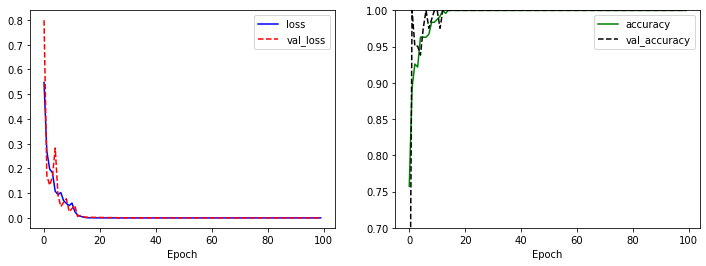

In [17]:
# 분류 모델의 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [18]:
# 분류 모델 평가

model.evaluate(test_X, test_Y)

2/2 [==============================] - 0s 998us/step - loss: 0.8953 - accuracy: 0.8409


[0.8952855467796326, 0.8409090638160706]

In [19]:
pred = model.predict(test_X)

In [34]:
import numpy as np
Pred = np.argmax(pred, axis=1)

In [30]:
Test_Y= np.argmax(test_Y, axis=1)

In [36]:
Pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [37]:
Test_Y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [35]:
#print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(Test_Y, Pred))
print('정밀도: %.3f' % precision_score(y_true=Test_Y, y_pred=Pred))
print('재현율: %.3f' % recall_score(y_true=Test_Y, y_pred=Pred))
print('F1: %.3f' % f1_score(y_true=Test_Y, y_pred=Pred))

정확도: 0.841
정밀도: 0.923
재현율: 0.900
F1: 0.911
